In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf

In [26]:
org_data = yf.download(tickers = '^RUI', start = '2014-03-11',end = '2024-07-10')
org_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^RUI,^RUI,^RUI,^RUI,^RUI,^RUI
Date,,,,,,
2014-03-11 00:00:00+00:00,1044.680054,1044.680054,1053.300049,1042.550049,1050.920044,0
2014-03-12 00:00:00+00:00,1045.270020,1045.270020,1045.280029,1037.119995,1042.479980,0
2014-03-13 00:00:00+00:00,1032.939941,1032.939941,1048.660034,1030.319946,1046.630005,0
2014-03-14 00:00:00+00:00,1030.800049,1030.800049,1036.599976,1029.910034,1031.880005,0
2014-03-17 00:00:00+00:00,1040.219971,1040.219971,1042.510010,1033.989990,1033.989990,0
2014-03-18 00:00:00+00:00,1048.030029,1048.030029,1048.839966,1041.079956,1041.079956,0
2014-03-19 00:00:00+00:00,1041.530029,1041.530029,1049.060059,1035.750000,1047.680054,0
2014-03-20 00:00:00+00:00,1047.219971,1047.219971,1048.069946,1037.739990,1040.459961,0


In [27]:
data = pd.DataFrame(index=org_data.index)
data['Adj Close'] = org_data['Adj Close']['^RUI']
data['Open'] = org_data['Open']['^RUI']
data['Close'] = org_data['Close']['^RUI']
data['High'] = org_data['High']['^RUI']
data['Low'] = org_data['Low']['^RUI']
data['Volume'] = org_data['Volume']['^RUI']

In [28]:
data.columns

Index(['Adj Close', 'Open', 'Close', 'High', 'Low', 'Volume'], dtype='object')

In [29]:
data.index.names

FrozenList(['Date'])

In [30]:
# Adding indicators
data['RSI']=ta.rsi(data['Close'], length=15)
data['EMAF']=ta.ema(data['Close'], length=20)
data['EMAM']=ta.ema(data['Close'], length=100)
data['EMAS']=ta.ema(data['Close'], length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

C:\Users\brais\AppData\Local\Temp\ipykernel_1620\1434510330.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [31]:
data

,Adj Close,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,1057.089966,1070.109985,1075.160034,1057.040039,34.465855,1091.443283,1086.583582,1076.719736,-17.380005,0,1039.380005
1,1039.380005,1056.760010,1060.709961,1039.030029,30.085160,1086.484875,1085.648858,1076.225170,-0.939941,0,1041.790039
2,1041.790039,1042.729980,1053.500000,1038.410034,31.357249,1082.228224,1084.780366,1075.769075,-1.790039,0,1034.479980
3,1034.479980,1036.270020,1038.359985,1010.799988,29.606606,1077.680773,1083.784319,1075.222200,8.209961,1,1035.989990
4,1035.989990,1027.780029,1043.010010,1019.520020,30.465778,1073.710222,1082.837897,1074.702568,8.790039,1,1049.040039
...,...,...,...,...,...,...,...,...,...,...,...
2444,2980.850098,2981.949951,2984.949951,2966.399902,66.257906,2952.935312,2832.424685,2767.694222,24.070068,1,2998.479980
2445,2998.479980,2974.409912,2998.820068,2972.939941,70.083997,2957.272899,2835.712908,2770.750987,4.000000,1,3013.159912
2446,3013.159912,3009.159912,3014.360107,2998.340088,72.832354,2962.595472,2839.226711,2773.961702,14.380127,1,3027.860107
2447,3027.860107,3013.479980,3029.439941,3009.899902,75.269925,2968.811151,2842.962025,2777.324594,-0.560059,0,3030.889893


In [32]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Adj Close,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,1057.089966,1070.109985,1075.160034,1057.040039,34.465855,1091.443283,1086.583582,1076.719736,-17.380005,0,1039.380005
1,1039.380005,1056.760010,1060.709961,1039.030029,30.085160,1086.484875,1085.648858,1076.225170,-0.939941,0,1041.790039
2,1041.790039,1042.729980,1053.500000,1038.410034,31.357249,1082.228224,1084.780366,1075.769075,-1.790039,0,1034.479980
3,1034.479980,1036.270020,1038.359985,1010.799988,29.606606,1077.680773,1083.784319,1075.222200,8.209961,1,1035.989990
4,1035.989990,1027.780029,1043.010010,1019.520020,30.465778,1073.710222,1082.837897,1074.702568,8.790039,1,1049.040039
5,1049.040039,1040.250000,1055.520020,1040.250000,37.526365,1071.360681,1082.168632,1074.362667,10.339966,1,1058.819946
6,1058.819946,1048.479980,1059.290039,1046.829956,42.235981,1070.166325,1081.706282,1074.156803,17.209961,1,1080.250000
7,1080.250000,1063.040039,1080.910034,1063.040039,50.922110,1071.126675,1081.677445,1074.237507,-9.339966,0,1071.780029
8,1071.780029,1081.119995,1084.660034,1071.670044,47.873605,1071.188899,1081.481456,1074.204958,8.849976,1,1085.130005
9,1085.130005,1076.280029,1091.369995,1076.280029,52.659620,1072.516624,1081.553705,1074.349661,6.500000,1,1092.589966


In [33]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [34]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.02528393 0.03128394 0.02918289 ... 0.55989233 0.         0.01653394]
 [0.01653827 0.02469032 0.02202946 ... 0.61881729 0.         0.01772377]
 [0.01772841 0.01776081 0.0184602  ... 0.61577035 0.         0.01411481]
 ...
 [0.99124445 0.98899083 0.98917344 ... 0.67372793 1.         0.99824253]
 [0.99850381 0.99112454 0.99663863 ... 0.62017888 0.         0.99973833]
 [1.         1.         1.         ... 0.60612898 0.         1.        ]]


In [35]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2449
[[[2.52839280e-02 3.12839402e-02 2.91828860e-02 ... 2.49756084e-02
   2.89039216e-03 1.50184189e-03]
  [1.65382678e-02 2.46903174e-02 2.20294551e-02 ... 2.24085085e-02
   2.36086390e-03 1.21203330e-03]
  [1.77284082e-02 1.77608126e-02 1.84602028e-02 ... 2.02047267e-02
   1.86885704e-03 9.44768477e-04]
  ...
  [6.62518727e-02 6.30124071e-02 6.24993523e-02 ... 3.89733378e-02
   7.08264663e-03 6.09673411e-03]
  [6.52740443e-02 6.53485692e-02 6.13310542e-02 ... 3.99392558e-02
   7.57720413e-03 6.51203814e-03]
  [6.65826984e-02 6.35260878e-02 6.19300993e-02 ... 4.09438471e-02
   8.09169629e-03 6.94240936e-03]]

 [[1.65382678e-02 2.46903174e-02 2.20294551e-02 ... 2.24085085e-02
   2.36086390e-03 1.21203330e-03]
  [1.77284082e-02 1.77608126e-02 1.84602028e-02 ... 2.02047267e-02
   1.86885704e-03 9.44768477e-04]
  [1.41185025e-02 1.45702042e-02 1.09652201e-02 ... 1.78503895e-02
   1.30458887e-03 6.24307296e-04]
  ...
  [6.52740443e-02 6.53485692e-02 6.13310542e-02 ... 3.99392558e-02
   7.

In [36]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [37]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1935
(1935, 30, 8)
(484, 30, 8)
(1935, 1)
(484, 1)
[[0.07128012]
 [0.07073706]
 [0.07222798]
 ...
 [0.61999081]
 [0.61350368]
 [0.63145941]]


In [38]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Activation
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
117/117 [==============================] - 6s 32ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 2/30
117/117 [==============================] - 5s 43ms/step - loss: 2.7860e-04 - val_loss: 0.0018
Epoch 3/30
117/117 [==============================] - 6s 51ms/step - loss: 2.6455e-04 - val_loss: 0.0023
Epoch 4/30
117/117 [==============================] - 6s 51ms/step - loss: 2.3007e-04 - val_loss: 0.0016
Epoch 5/30
117/117 [==============================] - 6s 50ms/step - loss: 2.2488e-04 - val_loss: 0.0011
Epoch 6/30
117/117 [==============================] - 5s 39ms/step - loss: 2.2859e-04 - val_loss: 9.9042e-04
Epoch 7/30
117/117 [==============================] - 3s 27ms/step - loss: 2.2010e-04 - val_loss: 8.3219e-04
Epoch 8/30
117/117 [==============================] - 3s 27ms/step - loss: 1.9996e-04 - val_loss: 7.5147e-04
Epoch 9/30
117/117 [==============================] - 3s 28ms/step - loss: 1.8593e-04 - val_loss: 8.8593e-04
Epoch 10/30
117/117 [======================

In [39]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 2s 17ms/step
[0.6349008] [0.6306152]
[0.6480106] [0.62985489]
[0.65036404] [0.62951921]
[0.6485483] [0.62333316]
[0.6516167] [0.64882285]
[0.6452685] [0.64773167]
[0.6632939] [0.66747959]
[0.6678773] [0.67183898]
[0.67994213] [0.67397179]
[0.68590975] [0.66413243]


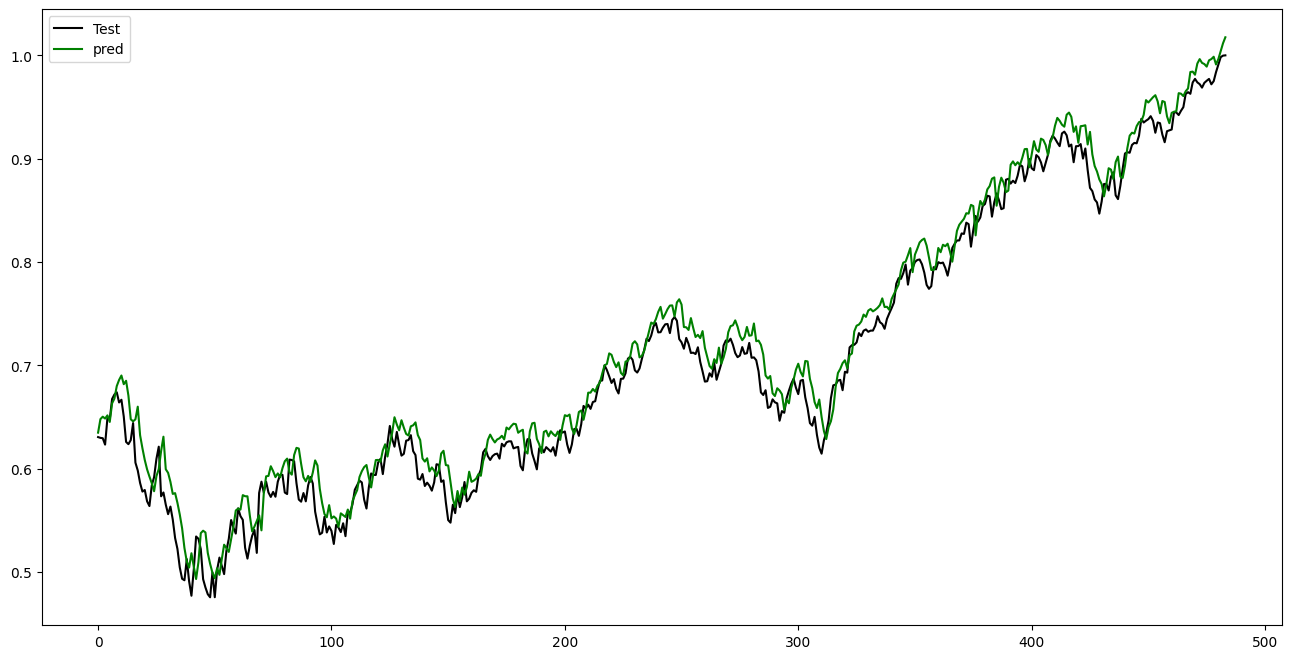

In [40]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()